i = 1, temp = UNKNOWN, x = 17, y = 29, % left = 100.0
i = 2, temp = COLDER, x = 49, y = 0, % left = 80.0
i = 3, temp = WARMER, x = 0, y = 49, % left = 49.0
i = 4, temp = WARMER, x = 0, y = 1, % left = 12.0
i = 5, temp = WARMER, x = 23, y = 24, % left = 5.76
i = 6, temp = WARMER, x = 1, y = 24, % left = 2.64
i = 7, temp = COLDER, x = 11, y = 14, % left = 1.44
i = 8, temp = WARMER, x = 1, y = 24, % left = 1.2
i = 9, temp = COLDER, x = 10, y = 24, % left = 0.6
i = 10, temp = WARMER, x = 1, y = 24, % left = 0.6
i = 11, temp = WARMER, x = 5, y = 20, % left = 0.24
Batman found the bomb!
Batman's final coordinates are: 5 23
The bomb's coordinates are: 5 23


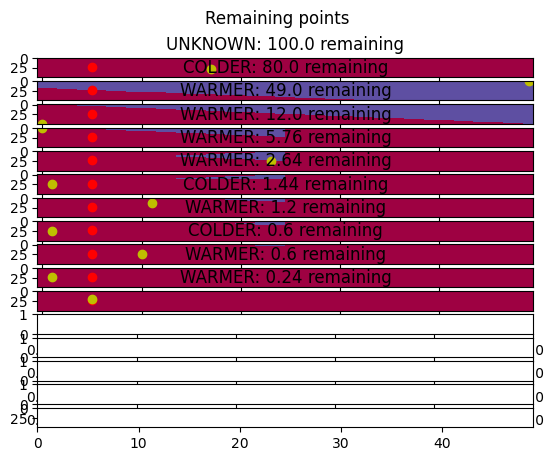

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#from matplotlib.patches import Circle

def get_distance(x1,x2,y1,y2):
    x_comp = ( x2 - x1 ) ** 2
    y_comp = ( y2 - y1 ) ** 2
    distance = np.sqrt( x_comp + y_comp )
    return(distance)

def get_temperature(batman):
    if batman.i == 1:
        temperature = "UNKNOWN"
    else:
        r = get_distance(batman.xy["x"]["current"],bomb_x_coordinate,batman.xy["y"]["current"],bomb_y_coordinate)
        if r == 0:
            return("BOILING")
        else:
            if batman.last_distance < r:
                temperature = "COLDER"
            if batman.last_distance > r:
                temperature = "WARMER"
            if batman.last_distance == r:
                temperature = "SAME"
        batman.last_distance = r
    return(temperature)

class Batman():
    def __init__(self,w,h,x0,y0,bx,by,n):
        self.last_distance = get_distance(x0,bx,y0,by)
        self.build_width = w - 1
        self.build_height = h - 1
        self.xy = dict()
        self.xy['x'] = {'known': False, 'current': x0, 'last': x0, 'min': 0, 'max': self.build_width, 'history': list()}  
        self.xy['y'] = {'known': False, 'current': y0, 'last': y0, 'min': 0, 'max': self.build_height, 'history': list()}
        self.max_moves = n
        self.grid_size = w * h
        self.percent_left = 100
        self.last_temp = "UNKNOWN"
        self.current_temp = "UNKNOWN"
        self.first_y_step = True
        self.grid = np.tile(True, (w,h))
        self.i = 1
        
    def closest_to_min(self,direction):
        value = self.xy[direction]["min"]
        while value in self.xy[direction]["history"]:
            value = value + 1
        return(value)

    def closest_to_max(self,direction):
        value = self.xy[direction]["max"]
        while value in self.xy[direction]["history"]:
            value = value - 1
        return(value)

    def get_dist_to_min(self,direction):
        dist = abs( round( self.xy[direction]["current"] - self.xy[direction]["min"]) )
        return(dist)

    def get_dist_to_max(self,direction):
        dist = abs( round( self.xy[direction]["current"] - self.xy[direction]["max"]) )
        return(dist)
    
    def get_largest_step(self):
        self.check_x_known()
        self.check_y_known()
        current_x,current_y = self.xy["x"]["current"], self.xy["y"]["current"]
        largest_distance = 0
        best_x, best_y = 0, 0
        for ix, iy in np.ndindex(self.grid.shape):
            if self.grid[ix, iy] == True:
                dist_to_current = get_distance(current_x,ix,current_y,iy)
                if dist_to_current > largest_distance:
                    largest_distance = dist_to_current
                    best_x = ix
                    best_y = iy
        self.xy["x"]["current"] = best_x
        self.xy["y"]["current"] = best_y
        # self.check_x_known()
        # self.check_y_known()
        # for direction in ["x","y"]:
        #     dist_to_min = self.get_dist_to_min(direction)
        #     dist_to_max = self.get_dist_to_max(direction)
        #     if dist_to_max > dist_to_min:
        #         if direction == "x":
        #             if self.xy["y"]["known"]:
        #                 self.xy[direction]["current"] = self.closest_to_max(direction)
        #             else:
        #                 self.xy[direction]["current"] = self.xy[direction]["max"]
        #         if direction == "y":
        #             if self.xy["x"]["known"]:
        #                 self.xy[direction]["current"] = self.closest_to_max(direction)
        #             else:
        #                 self.xy[direction]["current"] = self.xy[direction]["max"]
        #     else:
        #         if direction == "x":
        #             if self.xy["y"]["known"]:
        #                 self.xy[direction]["current"] = self.closest_to_min(direction)
        #             else:
        #                 self.xy[direction]["current"] = self.xy[direction]["min"]
        #         if direction == "y":
        #             if self.xy["x"]["known"]:
        #                 self.xy[direction]["current"] = self.closest_to_min(direction)
        #             else:
        #                 self.xy[direction]["current"] = self.xy[direction]["min"]
    
    def set_min(self,new_min,direction):
        if new_min >= self.xy[direction]['min'] and new_min <= self.xy[direction]['max']:
            self.xy[direction]["min"] = new_min
        elif new_min < self.xy[direction]['min'] and new_min <= self.xy[direction]['max']:
            return
        else:
            print("Error: The new x_min is greater than x_max")
            exit()

    def set_max(self,new_max,direction):
        if new_max <= self.xy[direction]['max'] and new_max >= self.xy[direction]['min']:
            self.xy[direction]["max"] = new_max
        elif new_max > self.xy[direction]['max'] and new_max >= self.xy[direction]['min']:
            return
        else:
            print("Error: The new x_max is smaller than x_min")
            exit()

    def set_known(self,direction,a):
        self.xy[direction]["current"] = a
        self.xy[direction]['known'] = True

    def get_percent_left(self,num_true):
        percent = round( ( 100.0 * ( num_true / self.grid_size ) ), 2)
        return(percent)

    def check_x_known(self):
        num_true = 0
        bomb_x = 0
        for x in range(self.grid.shape[0]):
            for y in self.grid[x,:]:
                if y == True:
                    bomb_x = x
                    num_true = num_true + 1
        if num_true == 1:
            self.set_known("x",bomb_x)
        self.percent_left = self.get_percent_left(num_true)

    def check_y_known(self):
        num_true = 0
        bomb_y = 0
        while num_true <= 1:
            for y in range(self.grid.shape[1]):
                for x in self.grid[:,y]:
                    if x == True:
                        bomb_y = y
                        num_true = num_true + 1
        if num_true == 1:
            self.set_known("y",bomb_y)
    
    def update_grid(self):
        current_x,current_y = self.xy["x"]["current"], self.xy["y"]["current"]
        last_x,last_y = self.xy["x"]["last"], self.xy["y"]["last"]
        for ix, iy in np.ndindex(self.grid.shape):
            if self.grid[ix, iy] == True:
                dist_to_current = get_distance(current_x,ix,current_y,iy)
                dist_to_last = get_distance(last_x,ix,last_y,iy)
                if self.current_temp == "WARMER":
                    if dist_to_current >= dist_to_last:
                        self.grid[ix, iy] = False
                    else:
                        self.grid[ix, iy] = True
                if self.current_temp == "COLDER":
                    if dist_to_current >= dist_to_last:
                        self.grid[ix, iy] = True
                    else:
                        self.grid[ix, iy] = False
                if self.current_temp == "SAME":
                    if dist_to_current == dist_to_last:
                        self.grid[ix, iy] = True
                    else:
                        self.grid[ix, iy] = False
        self.check_x_known()
        self.check_y_known()
        
    def verify_change(self):
        current_x,current_y = self.xy["x"]["current"], self.xy["y"]["current"]
        last_x,last_y = self.xy["x"]["last"], self.xy["y"]["last"]
        if current_x == last_x and current_y == last_y:
            print("Error: the guess value wasn't updated.")
            exit()
        self.xy["x"]['history'].append(self.xy["x"]['current'])
        self.xy["y"]['history'].append(self.xy["y"]['current'])
           
    def move(self):
        self.xy["x"]['last'],self.xy["y"]['last'] = self.xy["x"]["current"],self.xy["y"]['current']
        self.change_position()
        self.last_temp = self.current_temp
    
    def change_position(self):
        self.get_largest_step()
        self.verify_change()
        
# w: width of the building.
# h: height of the building.
w, h = 50, 50
n = 16  # maximum number of turns before game over.
x0, y0 = 17, 29
bomb_x_coordinate, bomb_y_coordinate = 5, 23
batman = Batman(w,h,x0,y0,bomb_x_coordinate, bomb_y_coordinate,n)
# game loop

fig, axs = plt.subplots(n)
fig.suptitle("Remaining points")
#axes = plt.subplot(n,1,n)
#define Matplotlib figure and axis
#cmap = plt.get_cmap("coolwarm")
#slicedCM = cmap(np.linspace(0, 1, n+1))
#axs[0].plot(bomb_x_coordinate,bomb_y_coordinate,'ro')
while True and batman.i <= n and not batman.xy["x"]["known"] and not batman.xy["y"]["known"]:
    batman.current_temp = get_temperature(batman)  # Current distance to the bomb compared to previous distance (COLDER, WARMER, SAME or UNKNOWN)
    if batman.current_temp == "BOILING":
        print("Batman found the bomb!")
        break
    batman.update_grid()
    print("i = "+str(batman.i)+", temp = "+str(batman.current_temp)+", x = "+str(batman.xy["x"]["current"])+", y = "+str(batman.xy["y"]["current"])+", % left = "+str(batman.percent_left))
    axs[batman.i-1].imshow(batman.grid, aspect='auto', cmap=plt.get_cmap("Spectral"), interpolation='nearest')
    axs[batman.i-1].plot(bomb_x_coordinate,bomb_y_coordinate,'ro')
    axs[batman.i-1].plot(batman.xy["x"]["current"],batman.xy["y"]["current"],'yo')
    axs[batman.i-1].title.set_text(batman.current_temp+": "+str(batman.percent_left)+" remaining")
    batman.move()
    batman.i = batman.i + 1

print("Batman's final coordinates are: "+str(batman.xy["x"]["current"])+" "+str(batman.xy["y"]["current"]))
print("The bomb's coordinates are: "+str(bomb_x_coordinate)+" "+str(bomb_y_coordinate))
    # the location of the next window Batman should jump to.
plt.xlim(0,batman.build_height)
plt.ylim(0,batman.build_width)
plt.gca().invert_yaxis()
plt.show()